# PCA and Clustering

## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## LOAD DATA

In [2]:
images = np.load(r'./../streamlit/images.npy')
scaled_similarity_matrix = np.load(r'./../streamlit/scaled_embeddings_similarity_matrix.npy')

In [3]:
labels = pd.read_csv(r'./../streamlit/labels.csv')

In [4]:
images.shape, scaled_similarity_matrix.shape

((5878, 224, 224, 3), (5878, 5878))

## PCA

In [ ]:
pca = PCA(n_components=0.80, random_state=1)
pca.fit(scaled_matrix)
pca_images = pca.transform(scaled_matrix)

In [ ]:
print(f"Components before PCA: {scaled_matrix.shape[1]}")
print(f"Components after PCA: {pca_images.shape[1]}")

Components before PCA: 25088
Components after PCA: 1094


In [ ]:
pca_images[5877]

array([ 10.047614 ,  22.860355 ,  23.02833  , ..., -10.543031 ,
        -1.0169526,  -9.62902  ], dtype=float32)

In [ ]:
pca_index = range(0, pca_images.shape[0])

## K-MEANS CLUSTERING

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=1)
kmeans.fit(pca_images)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=1)

In [ ]:
kmeans.labels_[:20]

array([2, 7, 0, 6, 4, 1, 6, 2, 6, 1, 6, 5, 4, 5, 2, 2, 4, 6, 4, 1],
      dtype=int32)

In [ ]:
# holds the cluster id and the images { id: [images] }
groups = {}
for ind, cluster in zip(pca_index,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(ind)
    else:
        groups[cluster].append(ind)

In [ ]:
groups.keys()

dict_keys([2, 7, 0, 6, 4, 1, 5, 3])

In [ ]:
# Function to visualize the distribution, mean and median of each continuous variable.
def show_cluster(cluster):
    a = 3  # number of rows
    b = 10  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize = (14, a*2))
    plt.suptitle(f"Products in Cluster {cluster}", fontsize = 15, y=1)
    plt.grid(False)

    for i in groups[cluster][:30]: 
        plt.subplot(a, b, c)
        fig = plt.imshow(images[i])
        plt.axis('off')
        c = c + 1

    plt.tight_layout()
    plt.show()

In [ ]:
sorted(groups.keys())

[0, 1, 2, 3, 4, 5, 6, 7]

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_62353/2867443391.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(a, b, c)


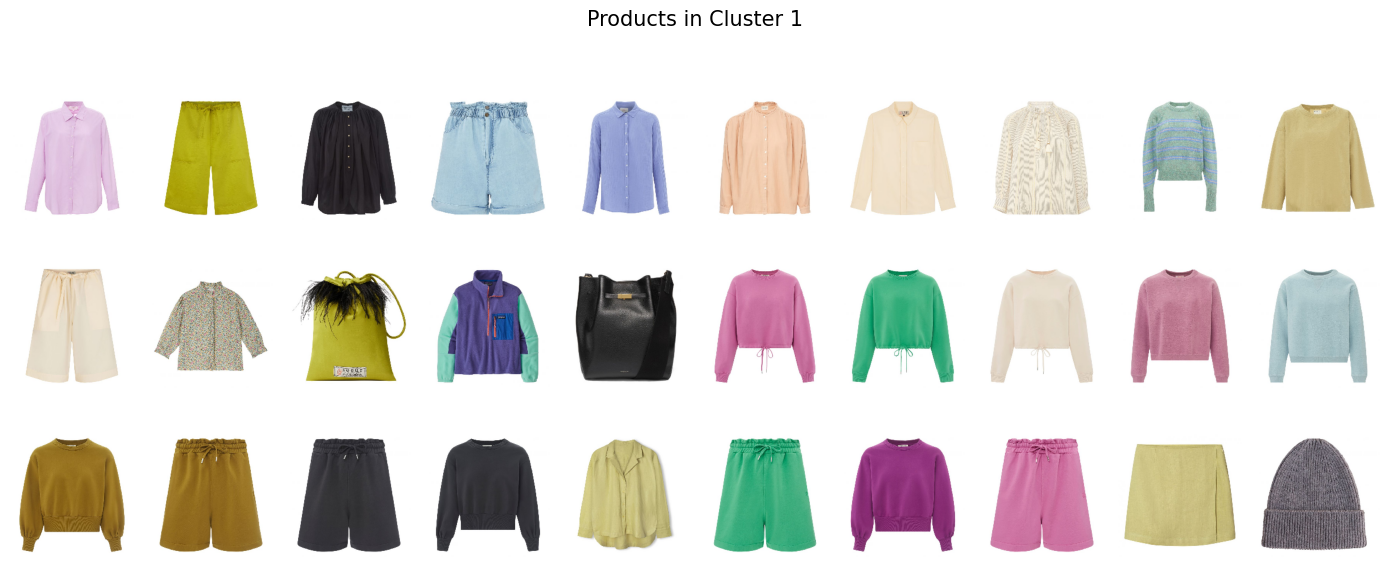

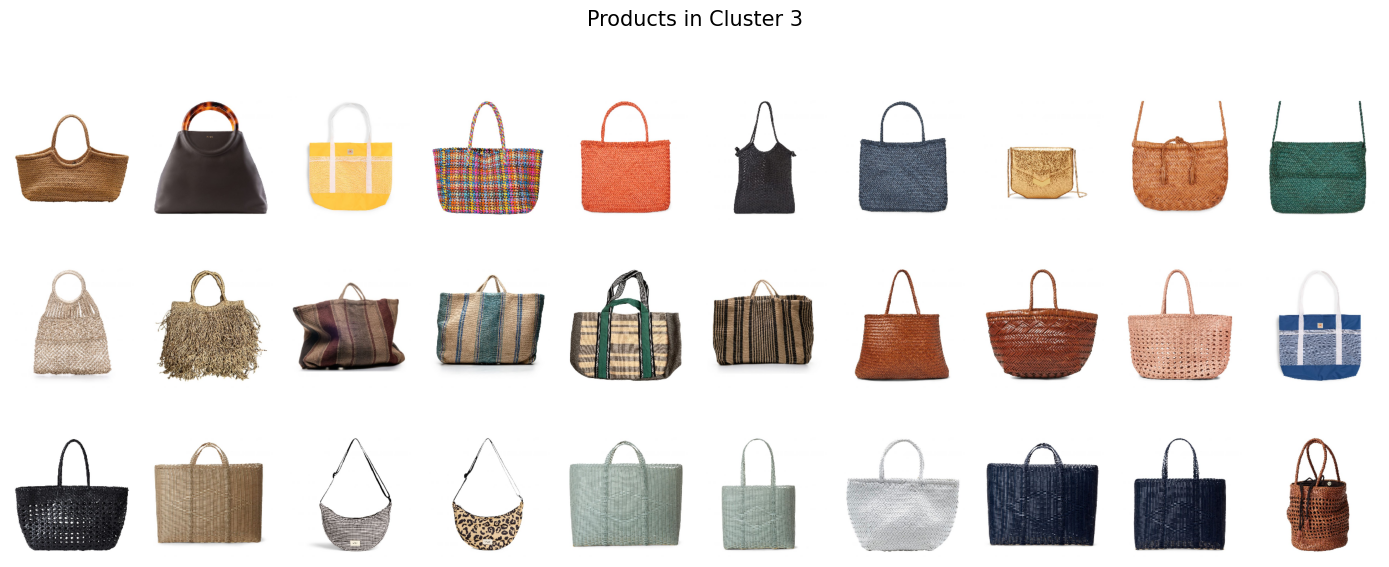

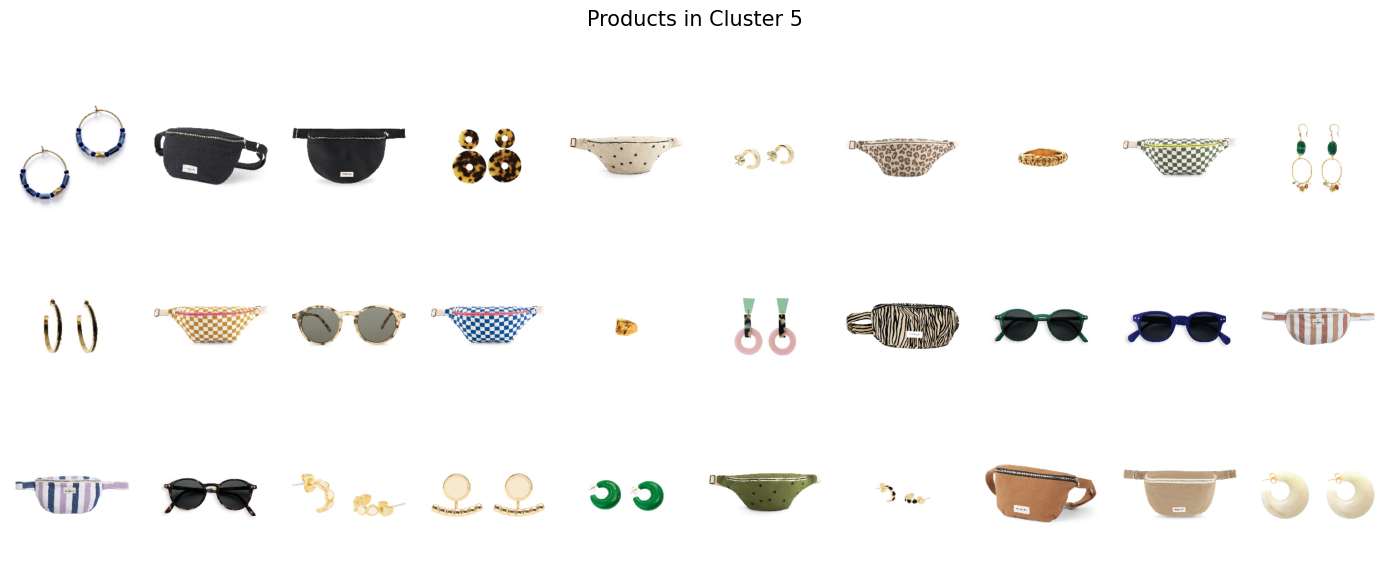

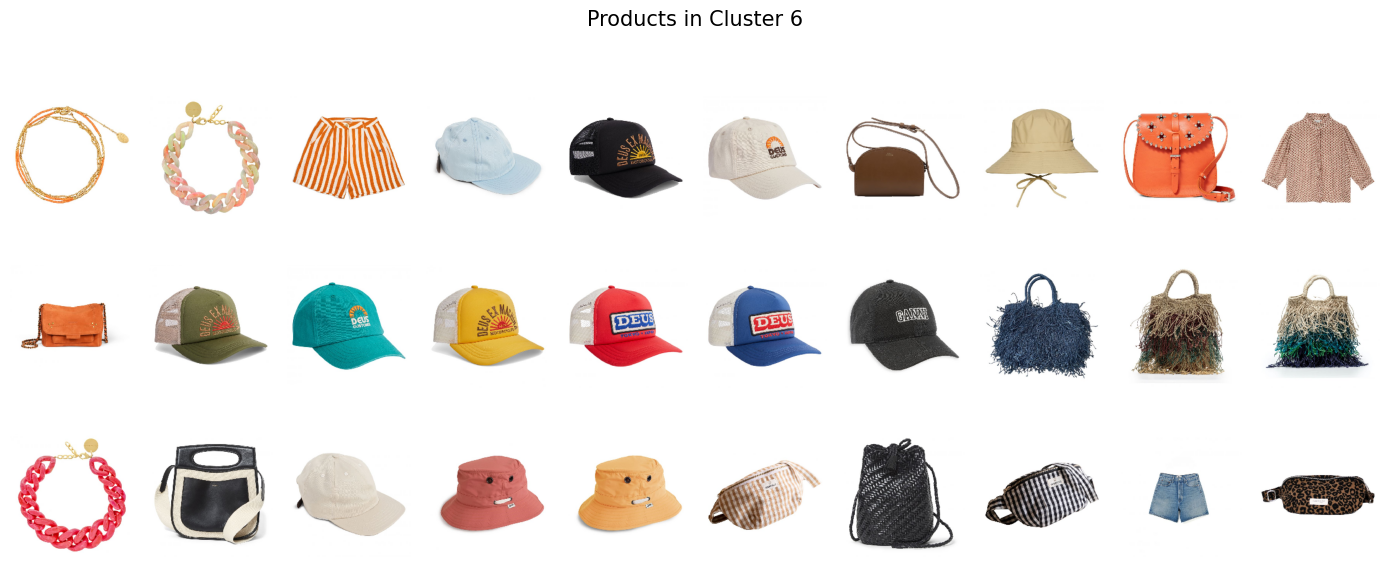

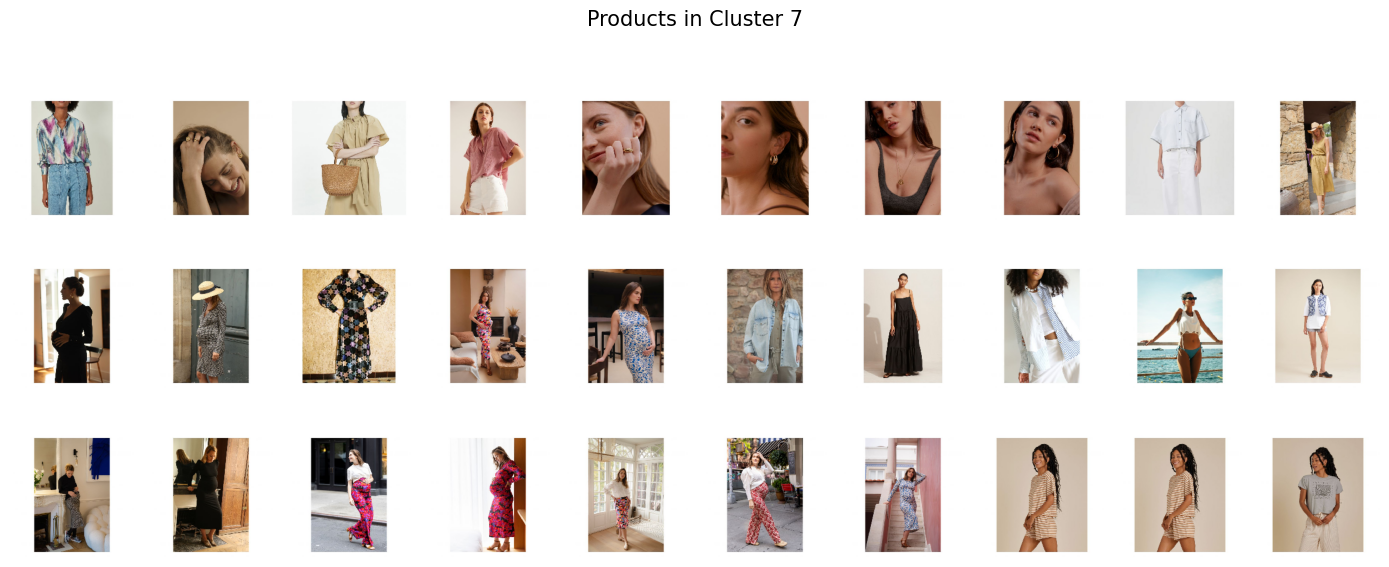

In [ ]:
for k in sorted(groups.keys()):
    show_cluster(k)